In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CLEANED dataset you saved in Week 2/3
# If you used a different name, make sure the filename matches exactly
file_path = r'D:\RoadSafe_Analytics\data\US_Accidents_Cleaned_Final.csv'
df = pd.read_csv(file_path)

# Ensure the time features are active for the plots below
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()

sns.set_theme(style="whitegrid")
print("✔ Setup Complete: Libraries loaded and Data defined as 'df'")

✔ Setup Complete: Libraries loaded and Data defined as 'df'


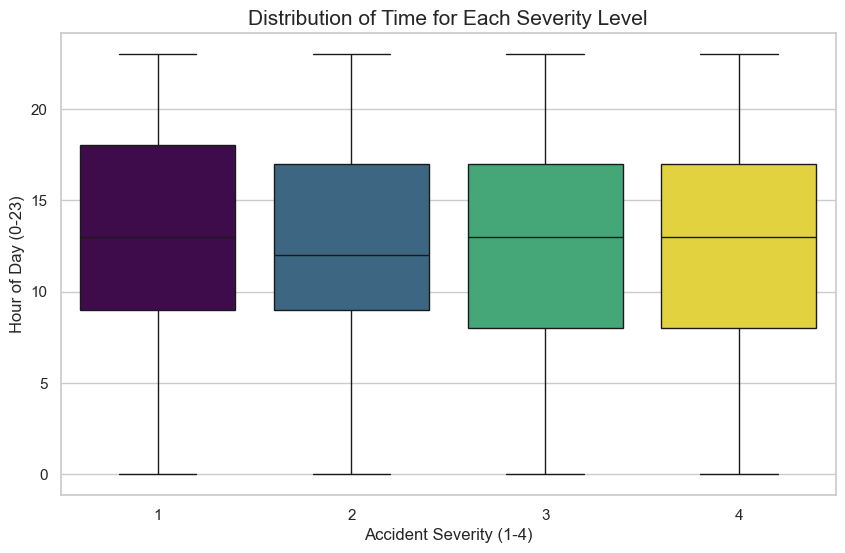

In [2]:
plt.figure(figsize=(10, 6))
# Boxplots show the 'spread' of time for each severity level
sns.boxplot(data=df, x='Severity', y='Hour', hue='Severity', palette='viridis', legend=False)

plt.title('Distribution of Time for Each Severity Level', fontsize=15)
plt.xlabel('Accident Severity (1-4)')
plt.ylabel('Hour of Day (0-23)')
plt.show()

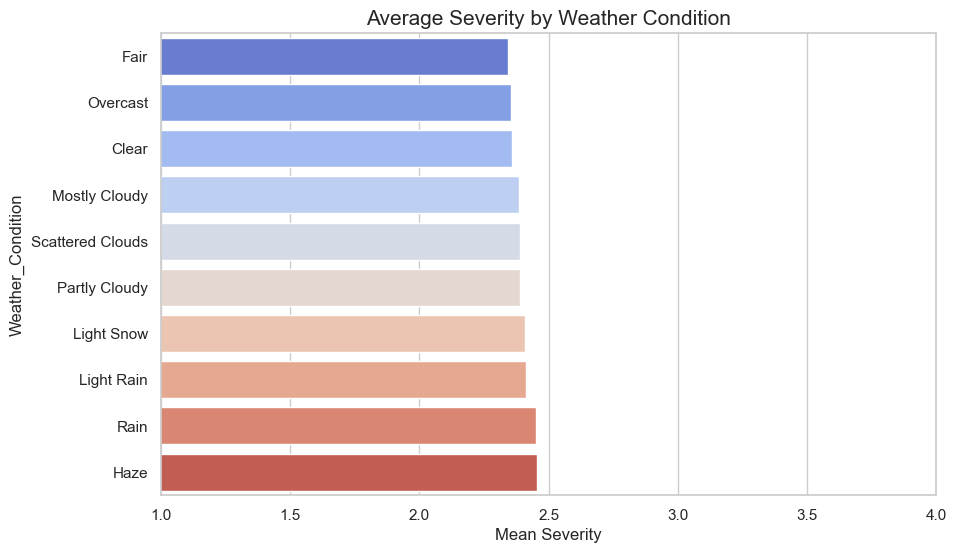

In [3]:
# We look at the average severity for the top 10 weather conditions
top_weather = df['Weather_Condition'].value_counts().head(10).index
weather_avg_sev = df[df['Weather_Condition'].isin(top_weather)].groupby('Weather_Condition')['Severity'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=weather_avg_sev.values, y=weather_avg_sev.index, hue=weather_avg_sev.index, palette='coolwarm', legend=False)

plt.title('Average Severity by Weather Condition', fontsize=15)
plt.xlabel('Mean Severity')
plt.xlim(1, 4) # Severity is on a scale of 1 to 4
plt.show()

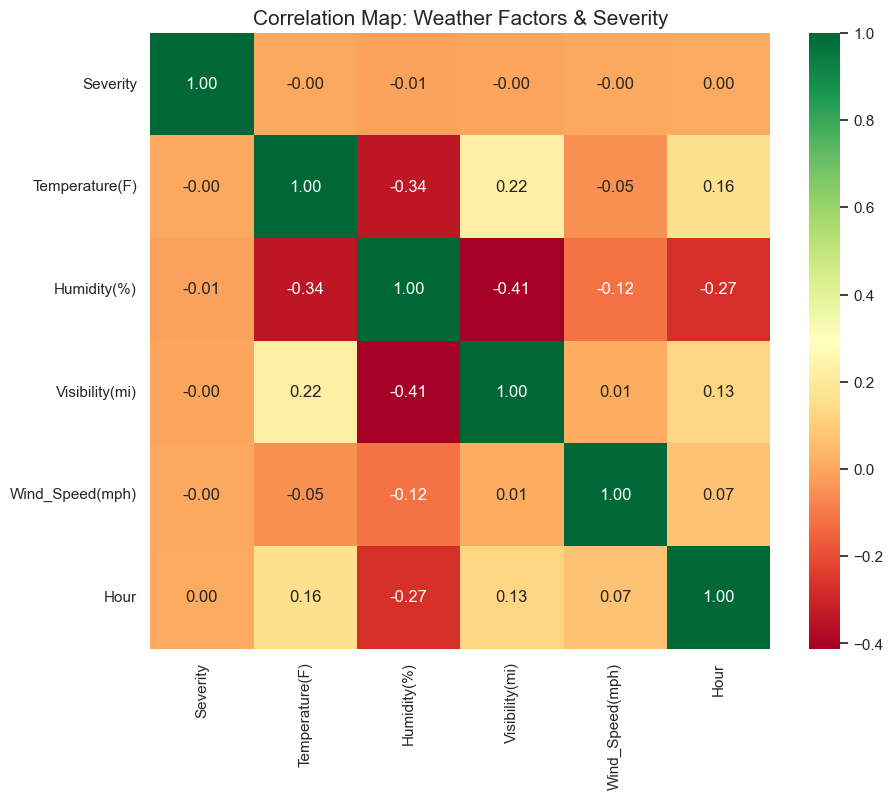

In [4]:
plt.figure(figsize=(10, 8))
# Select only the columns that have numbers
numeric_cols = df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Hour']].corr()

sns.heatmap(numeric_cols, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlation Map: Weather Factors & Severity', fontsize=15)
plt.show()